In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import

In [2]:
acc = pd.read_csv('./../Data_phone/pali-otthon/Accelerometer.csv',sep=',',header=0,names=['time','seconds_elapsed','acc_z','acc_y','acc_x'])
gyr = pd.read_csv('./../Data_phone/pali-otthon/Gyroscope.csv',sep=',',header=0,names=['time','seconds_elapsed','gyr_z','gyr_y','gyr_x'])
loc = pd.read_csv('./../Data_phone/pali-otthon/Location.csv',sep=',')
#loc2 = pd.read_csv('./../Data_phone/pe-otthon_2/Location.csv',sep=',')  # for GPS coordinate comparison

In [3]:
acc.head()

,time,seconds_elapsed,acc_z,acc_y,acc_x
0,1709479874816941300,0.030941,0.003924,-0.323628,-0.246644
1,1709479874826998300,0.040998,-0.285720,0.284784,-0.068226
2,1709479874837056500,0.051056,0.692226,-0.024066,-0.644851
3,1709479874847114200,0.061114,-0.363028,-0.022247,-0.183344
4,1709479874857171200,0.071171,0.338663,0.214720,0.074267


In [4]:
gyr.head()

,time,seconds_elapsed,gyr_z,gyr_y,gyr_x
0,1709479874816941300,0.030941,-0.013459,0.080146,-0.007117
1,1709479874826998300,0.040998,-0.023030,0.055037,0.004746
2,1709479874837056500,0.051056,-0.013440,0.075295,-0.001381
3,1709479874847114200,0.061114,-0.014847,0.065443,0.003200
4,1709479874857171200,0.071171,-0.026248,0.010992,0.013625


In [5]:
loc.head()

,time,seconds_elapsed,altitude,speedAccuracy,bearingAccuracy,latitude,altitudeAboveMeanSeaLevel,bearing,horizontalAccuracy,verticalAccuracy,longitude,speed
0,1709479873865227300,-0.920773,246.856041,2.292595,4.807578,46.900018,202.266041,191.146108,20.684499,9.131487,16.857607,18.467590
1,1709479874815228200,0.029228,246.584823,2.269564,4.680996,46.899864,201.994823,192.365542,18.287537,9.352351,16.857550,18.467590
2,1709479875764985000,0.978985,246.320597,1.646187,3.692223,46.899699,201.730597,192.944233,15.822907,8.329897,16.857502,18.466200
3,1709479876714516200,1.928516,245.907159,1.659869,3.492573,46.899538,201.317159,193.357769,14.448981,7.156504,16.857457,18.466200
4,1709479877664355600,2.878355,245.818161,1.718456,3.723896,46.899374,201.228160,191.726008,13.294145,7.142480,16.857412,18.908745


# Cleaning

In [6]:
df = pd.concat([acc, gyr[['gyr_z','gyr_y','gyr_x']]], axis=1)
df.head()

,time,seconds_elapsed,acc_z,acc_y,acc_x,gyr_z,gyr_y,gyr_x
0,1709479874816941300,0.030941,0.003924,-0.323628,-0.246644,-0.013459,0.080146,-0.007117
1,1709479874826998300,0.040998,-0.285720,0.284784,-0.068226,-0.023030,0.055037,0.004746
2,1709479874837056500,0.051056,0.692226,-0.024066,-0.644851,-0.013440,0.075295,-0.001381
3,1709479874847114200,0.061114,-0.363028,-0.022247,-0.183344,-0.014847,0.065443,0.003200
4,1709479874857171200,0.071171,0.338663,0.214720,0.074267,-0.026248,0.010992,0.013625


- Interpolate the location data

In [7]:
loc_new = pd.DataFrame()
fp = loc['seconds_elapsed'] #interpolaciohoz: ismert adatpontok helye
x = df['seconds_elapsed'] #interpolaciohoz: uj adatpontok helye

for j in ['latitude','longitude','speed']:
    xp = loc[j] #interpolaciohoz: eredeti y ertekek
    loc_new[j] = np.interp(x, fp, xp) 

loc_new.head()

,latitude,longitude,speed
0,46.899863,16.857550,18.467588
1,46.899862,16.857549,18.467573
2,46.899860,16.857549,18.467558
3,46.899858,16.857548,18.467544
4,46.899856,16.857548,18.467529


In [8]:
df = pd.concat([df, loc_new], axis=1)
df.head()

,time,seconds_elapsed,acc_z,acc_y,acc_x,gyr_z,gyr_y,gyr_x,latitude,longitude,speed
0,1709479874816941300,0.030941,0.003924,-0.323628,-0.246644,-0.013459,0.080146,-0.007117,46.899863,16.857550,18.467588
1,1709479874826998300,0.040998,-0.285720,0.284784,-0.068226,-0.023030,0.055037,0.004746,46.899862,16.857549,18.467573
2,1709479874837056500,0.051056,0.692226,-0.024066,-0.644851,-0.013440,0.075295,-0.001381,46.899860,16.857549,18.467558
3,1709479874847114200,0.061114,-0.363028,-0.022247,-0.183344,-0.014847,0.065443,0.003200,46.899858,16.857548,18.467544
4,1709479874857171200,0.071171,0.338663,0.214720,0.074267,-0.026248,0.010992,0.013625,46.899856,16.857548,18.467529


In [9]:
df.rename(columns={"latitude":"lat", "longitude": "lon"},inplace=True)
df.head()

,time,seconds_elapsed,acc_z,acc_y,acc_x,gyr_z,gyr_y,gyr_x,lat,lon,speed
0,1709479874816941300,0.030941,0.003924,-0.323628,-0.246644,-0.013459,0.080146,-0.007117,46.899863,16.857550,18.467588
1,1709479874826998300,0.040998,-0.285720,0.284784,-0.068226,-0.023030,0.055037,0.004746,46.899862,16.857549,18.467573
2,1709479874837056500,0.051056,0.692226,-0.024066,-0.644851,-0.013440,0.075295,-0.001381,46.899860,16.857549,18.467558
3,1709479874847114200,0.061114,-0.363028,-0.022247,-0.183344,-0.014847,0.065443,0.003200,46.899858,16.857548,18.467544
4,1709479874857171200,0.071171,0.338663,0.214720,0.074267,-0.026248,0.010992,0.013625,46.899856,16.857548,18.467529


- Scaling

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [11]:
scaler_mms = MinMaxScaler()
scaler_mms.fit(df[['acc_z','acc_y','acc_x','gyr_z','gyr_y','gyr_x']])
scaled_mms = scaler_mms.transform(df[['acc_z','acc_y','acc_x','gyr_z','gyr_y','gyr_x']])
df_scaled = pd.DataFrame(scaled_mms, index=df.index, columns=['acc_z','acc_y','acc_x','gyr_z','gyr_y','gyr_x'])

In [12]:
df_scaled['lat'] = df['lat']
df_scaled['lon'] = df['lon']
df_scaled['speed'] = df['speed']
df_scaled['time'] = df['time']
df_scaled['seconds_elapsed'] = df['seconds_elapsed']
#df_scaled['abs_time'] = df['time']
df_scaled.head()

,acc_z,acc_y,acc_x,gyr_z,gyr_y,gyr_x,lat,lon,speed,time,seconds_elapsed
0,0.396099,0.364361,0.465309,0.535791,0.639964,0.447846,46.899863,16.857550,18.467588,1709479874816941300,0.030941
1,0.377129,0.442900,0.489948,0.527270,0.602785,0.472696,46.899862,16.857549,18.467573,1709479874826998300,0.040998
2,0.441177,0.403031,0.410317,0.535808,0.632780,0.459862,46.899860,16.857549,18.467558,1709479874837056500,0.051056
3,0.372066,0.403266,0.474050,0.534556,0.618193,0.469459,46.899858,16.857548,18.467544,1709479874847114200,0.061114
4,0.418021,0.433856,0.509626,0.524405,0.537569,0.491298,46.899856,16.857548,18.467529,1709479874857171200,0.071171


- Spatial resampling

In [13]:
dDist = []
for j in np.arange(2,len(df)):
    d = abs(np.arccos(np.cos(np.deg2rad(90-df_scaled['lat'].loc[j-1])) * np.cos(np.deg2rad(90-df_scaled['lat'].loc[j])) + np.sin(np.deg2rad(90-df_scaled['lat'].loc[j-1])) * np.sin(np.deg2rad(90-df_scaled['lat'].loc[j]))) * np.cos(np.deg2rad(df_scaled['lon'].loc[j-1]-df_scaled['lon'].loc[j])) * 3958.76);
    dDist.append(d)
df_dDist = pd.DataFrame(dDist)
df_dDist.fillna(0,inplace=True) #remove the NaN values, introduced from the above calculation
df_dDist.isna().value_counts()

C:\Users\Admin\AppData\Local\Temp\ipykernel_24884\2906762954.py:3: RuntimeWarning: invalid value encountered in arccos
  d = abs(np.arccos(np.cos(np.deg2rad(90-df_scaled['lat'].loc[j-1])) * np.cos(np.deg2rad(90-df_scaled['lat'].loc[j])) + np.sin(np.deg2rad(90-df_scaled['lat'].loc[j-1])) * np.sin(np.deg2rad(90-df_scaled['lat'].loc[j]))) * np.cos(np.deg2rad(df_scaled['lon'].loc[j-1]-df_scaled['lon'].loc[j])) * 3958.76);


0    
False    78375
Name: count, dtype: int64

In [14]:
summed = np.cumsum(df_dDist.to_numpy())*1000   #calculated the total travelles distance by cumsum function
uniqe_indexes = np.unique(summed,return_index=True)
#uniqe_indexes
#xp[uniqe_indexes[1]]
x = np.arange(0,max(summed),0.2)

# Then we use again the interp function to convert the time domain to the spatial domain
df_spatial = pd.DataFrame()
for j in ['acc_z','acc_y','acc_x','gyr_z','gyr_y','gyr_x','lat','lon','speed','time','seconds_elapsed']:
    xp = df_scaled[j]
    df_spatial[j] = np.interp(x,uniqe_indexes[0],xp[uniqe_indexes[1]])

# Spatial resample done!

- Check the results

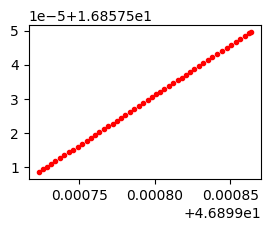

In [15]:
plt.figure(figsize=(3,2))
plt.plot(df_spatial['lat'][:50],df_spatial['lon'][:50],'r.')

# Analysis

### PCA

In [16]:
from sklearn.decomposition import PCA

<Axes: >

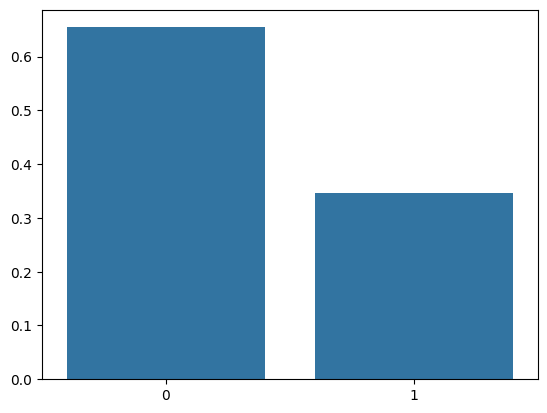

In [17]:
pca = PCA()
pca.fit(df_spatial[['acc_z','gyr_x']]) #gyr_z and acc_y has been removed, because these had a great negative effect from maneuvers
df_pca = pca.transform(df_spatial[['acc_z','gyr_x']]) #,'acc_x','gyr_y',

# Good accuracy with: acc_z, gyr_x, 
sns.barplot(x=np.arange(0,len(pca.explained_variance_ratio_)),y=pca.explained_variance_ratio_)

<Axes: >

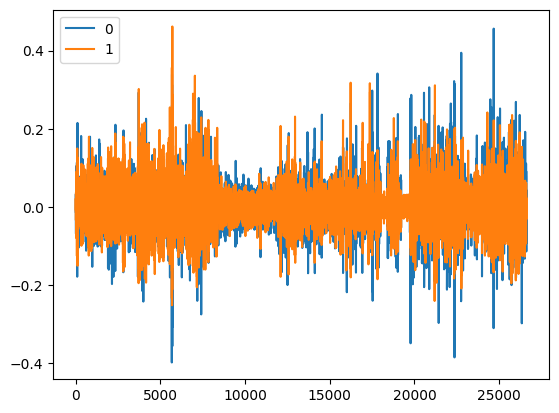

In [18]:
df_pca = pd.DataFrame(df_pca)
df_pca.plot()

### K-Means clustering

In [19]:
from sklearn.cluster import AgglomerativeClustering
import plotly.graph_objects as go
import plotly.express as px

In [20]:
model = AgglomerativeClustering(n_clusters=4)
cluster_labels = model.fit_predict(df_pca)
#cluster_labels = model.fit_predict(df_spatial[['acc_z','acc_y','acc_x','gyr_y','gyr_x']])

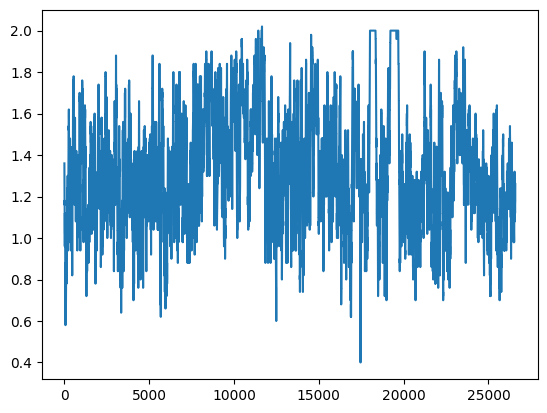

In [34]:
"""
def moving_average(a, n=50):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

filtered = moving_average(cluster_labels)

plt.plot(filtered)
"""
# with Golay-Savitzky filter
from scipy.signal import savgol_filter

filter = savgol_filter(cluster_labels, 50, 2)

In [35]:
fig = px.scatter_mapbox(lat=df_spatial['lat'][:26000], lon=df_spatial['lon'][:26000], color= filtered[:26000] ,zoom=10, width=500, height=500 , color_continuous_scale=px.colors.diverging.RdYlGn) #, hover_name="City", hover_data=["State", "Population"], color_discrete_sequence=["fuchsia"], zoom=3, height=300)

#fig.update_geos(scope='europe')
fig.update_geos(fitbounds="locations")
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(mapbox_style="open-street-map")

#fig.show()

<Axes: >

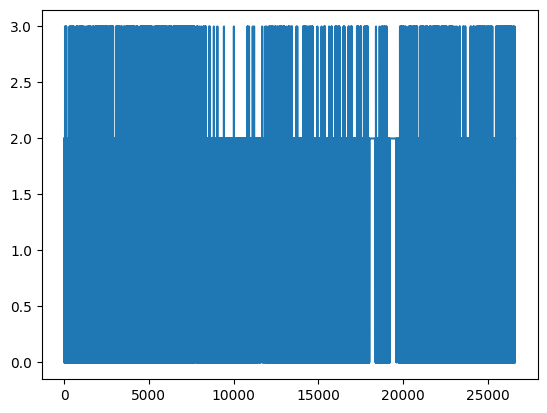

In [41]:
# Save the results

df_labelled = pd.concat([df_spatial, df_pca], axis=1)
# Assuming df is your DataFrame
new_column_names = {
    0: 'pca_0',
    1: 'pca_1'
}
df_labelled = df_labelled.rename(columns=new_column_names)
df_labelled = pd.concat([df_labelled,pd.DataFrame(cluster_labels)], axis=1)

new_column_names = {
    0: 'label'
}
df_labelled = df_labelled.rename(columns=new_column_names)

df_labelled

In [44]:
df_labelled.to_csv('labelled_data.csv',index=False)

<Axes: >

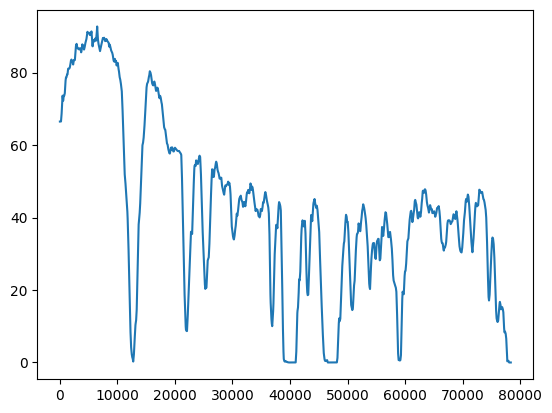

In [23]:
(df['speed']*3.6).plot()

<Axes: xlabel='seconds_elapsed', ylabel='gyr_z'>

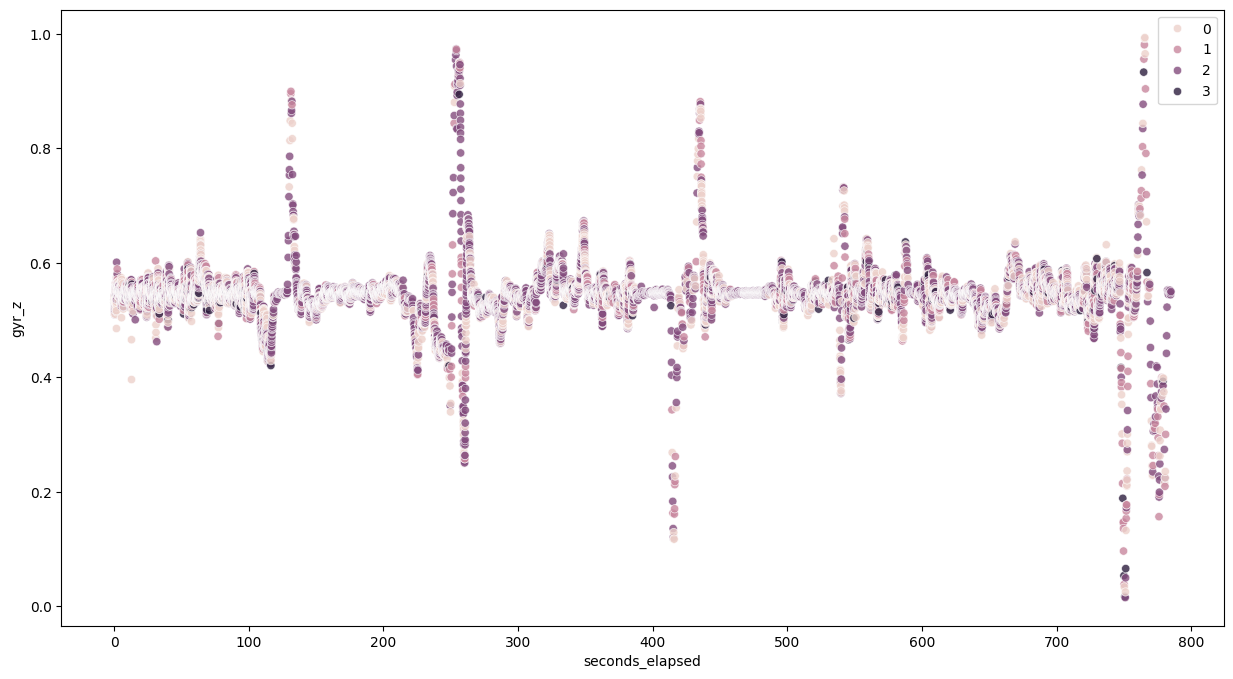

In [24]:
# Which variable is relevant for the manoevre effect?
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_spatial,x='seconds_elapsed',y='gyr_z',hue=cluster_labels, alpha=0.8)

### Get street name for coordinates

In [25]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [26]:
test=pd.DataFrame()
test["coordinates"] = df["lat"][:10].apply(str)+ " , " +df["lon"][:10].apply(str)
test

,coordinates
0,"46.899863336758465 , 16.857549591594424"
1,"46.899861598052134 , 16.857549081793472"
2,"46.899859859134764 , 16.857548571930643"
3,"46.8998581202596 , 16.857548062080188"
4,"46.89985638155327 , 16.857547552279236"
5,"46.899854642593695 , 16.85754704240403"
6,"46.89985290371853 , 16.857546532553574"
7,"46.899851164969995 , 16.857546022740248"
8,"46.89984942609483 , 16.857545512889793"
9,"46.899847687177456 , 16.857545003026964"


In [27]:
geolocator = Nominatim(user_agent="Nancy Amandi", timeout= 10) #or user agent is https://nominatim.openstreetmap.org/reverse?lat=<value>&lon=<value>&<params>
rgeocode = RateLimiter(geolocator.reverse, min_delay_seconds=0.1)
test["location"] = test["coordinates"].apply(rgeocode)

In [29]:
test

,coordinates,location
0,"46.899863336758465 , 16.857549591594424","(74, Egervár, Zalaegerszegi járás, Zala vármeg..."
1,"46.899861598052134 , 16.857549081793472","(74, Egervár, Zalaegerszegi járás, Zala vármeg..."
2,"46.899859859134764 , 16.857548571930643","(74, Egervár, Zalaegerszegi járás, Zala vármeg..."
3,"46.8998581202596 , 16.857548062080188","(74, Egervár, Zalaegerszegi járás, Zala vármeg..."
4,"46.89985638155327 , 16.857547552279236","(74, Egervár, Zalaegerszegi járás, Zala vármeg..."
5,"46.899854642593695 , 16.85754704240403","(74, Egervár, Zalaegerszegi járás, Zala vármeg..."
6,"46.89985290371853 , 16.857546532553574","(74, Egervár, Zalaegerszegi járás, Zala vármeg..."
7,"46.899851164969995 , 16.857546022740248","(74, Egervár, Zalaegerszegi járás, Zala vármeg..."
8,"46.89984942609483 , 16.857545512889793","(74, Egervár, Zalaegerszegi járás, Zala vármeg..."
9,"46.899847687177456 , 16.857545003026964","(74, Egervár, Zalaegerszegi járás, Zala vármeg..."
